# STATISTICAL TESTING

In [86]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

In [87]:
df = pd.read_csv('DW2.csv')
df.head()

,Unnamed: 0,age,sex,chest_pain,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
0,0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [88]:
df1 = df[df['target'] ==1]
df2 = df[df['target'] ==0]

d1 = df1['resting_blood_pressure']
d2 = df2['resting_blood_pressure']

# Resting blood presssure
### Shapiro Test for normal distrubution
Ho = normally distributed

Ha = non normal distribution

In [175]:
def normal_dist(r1,alpha):
    stat, p_value = stats.shapiro(r1)
    print('p_value=%.3f'%(p_value))
    if p_value > alpha:
        print('Not enough evidence distribution is not normal (assume distribution is normal)')
    else:
        print('Not enough evidence distribution is normal (assume distribution is not normal)')     

In [176]:
normal_dist(d1,0.05)

p_value=0.013
Not enough evidence distribution is normal (assume distribution is not normal)


In [177]:
normal_dist(d2,0.05)

p_value=0.001
Not enough evidence distribution is normal (assume distribution is not normal)


### Levene's Test for eqaul variance
Ho = sample has equal distibution

Ha = sample has unequal distibution

In [198]:
def equal_variance(r1,r2,alpha):
    stat, p_value = stats.levene(r1,r2)
    print('p_value=%.3f'%(p_value))
    if p_value > alpha:
        print('Not enough evidence the distribution has unequal variance (assume distribution has equal variance)')
    else:
        print('Not enough evidence the distribution has equal variance (assume distribution has unequal variance)')     

In [179]:
equal_variance(d1,d2,alpha)

p_value=0.421
Not enough evidence the distribution has unequal variance (assume distribution has equal varaince)


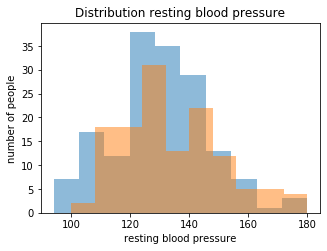

In [180]:
_ = plt.figure(figsize=(5,3.5))
_ = plt.hist(d1, bins=10,alpha=0.5)
_ = plt.hist(d2, bins=10,alpha=0.5)
_ = plt.xlabel('resting blood pressure')
_ = plt.ylabel('number of people')
_ = plt.title('Distribution resting blood pressure')
_ = plt.savefig('rbp.jpg')

In [181]:
def compare_2_groups(r1,r2,alpha,sample_size):
    stat, p_value = stats.ttest_ind(r1,r2)
    print('p_value=%.3f'%(p_value))
    if p_value > alpha:
        print('Not enough evidence they are from different distribution (fail to reject H0)')
    else:
        print('Not enough evidence they are from the same distribution ( reject H0)')     

## t Test to check similarity of population of distribution
Ho = mean of distribution 1 equal to mean of distribution 2

Ha = mean of distribution 1 not equal to mean of distribution 2

In [192]:
sample_size=300
target1 = np.random.choice(dc1, sample_size)
target2 = np.random.choice(dc2, sample_size)
compare_2_groups(target1,target2,0.05,sample_size)

p_value=0.069
Not enough evidence they are from different distribution (fail to reject H0)


## Bootstrap distribution of 10000 random samples from Resting blood presssure sample

In [183]:
np.random.seed(47)
N_rep = 10000

def bootstrap_rep(data, func):
    bs_sample = np.random.choice(data, len(data))
    return func(bs_sample)

def draw_bs_reps(data, func, size=1):
    
    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_rep(data, func)

    return bs_replicates

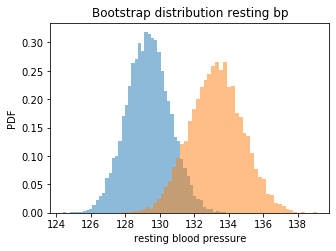

In [184]:
np.random.seed(47)
# Take 10,000 bootstrap replicates of the mean: bs_replicates
bs_replicate1 = draw_bs_reps(d1, np.mean, size=10000)
bs_replicate2 = draw_bs_reps(d2, np.mean, size=10000)

# Make a histogram of the results
_ = plt.figure(figsize=(5,3.5))
_ = plt.hist(bs_replicate1, bins=50, density=True,alpha=0.5)
_ = plt.hist(bs_replicate2, bins=50, density=True,alpha=0.5)
_ = plt.title('Bootstrap distribution resting bp')
_ = plt.xlabel('resting blood pressure')
_ = plt.ylabel('PDF')
_ = plt.savefig('rbp_distmean.jpg')

In [40]:
T,pvalue = stats.ttest_ind(d1, d2, equal_var=True)
print(abs(round(T,3)),'>',round(pvalue,3))
print('Reject Null hypothesis, average resting blood pressure in patients with heart disease and those \nwithout are significantly different')

1.984 > 0.048
Reject Null hypothesis, average resting blood pressure in patients with heart disease and those 
without are significantly different


# Cholesterol
### Shapiro Test for normal distrubution
Ho = normally distributed

Ha = non normal distribution

In [41]:
dc1 = df1['cholesterol']
dc2 = df2['cholesterol']

In [185]:
normal_dist(dc1,0.05)

p_value=0.025
Not enough evidence distribution is normal (assume distribution is not normal)


In [194]:
normal_dist(dc2,0.05)

p_value=0.799
Not enough evidence distribution is not normal (assume distribution is normal)


### Levene's Test for eqaul variance
Ho = sample has equal distibution

Ha = sample has unequal distibution

In [199]:
equal_variance(dc1,dc2,0.05)

p_value=0.559
Not enough evidence the distribution has unequal variance (assume distribution has equal variance)


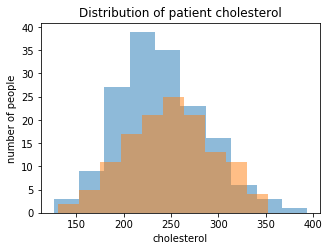

In [43]:
_ = plt.figure(figsize=(5,3.5))
_ = plt.hist(dc1, bins=10,alpha=0.5)
_ = plt.hist(dc2, bins=10,alpha=0.5)
_ = plt.xlabel('cholesterol')
_ = plt.ylabel('number of people')
_ = plt.title('Distribution of patient cholesterol')
_ = plt.savefig('col.jpg')

## t Test to check similarity of population of distribution
Ho = mean of distribution 1 equal to mean of distribution 2

Ha = mean of distribution 1 not equal to mean of distribution 2

In [201]:
sample_size=300
target1 = np.random.choice(dc1, sample_size)
target2 = np.random.choice(d2, sample_size)
compare_2_groups(target1,target2,0.05,sample_size)

p_value=0.006
Not enough evidence they are from the same distribution ( reject H0)


## Bootstrap distribution of 10000 random samples from Cholesterol sample

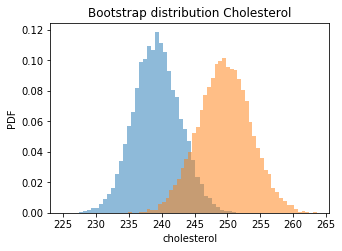

In [44]:
np.random.seed(47)
# Take 10,000 bootstrap replicates of the mean: bs_replicates
bs_replicatec1 = draw_bs_reps(dc1, np.mean, size=10000)
bs_replicatec2 = draw_bs_reps(dc2, np.mean, size=10000)

# Make a histogram of the results
_ = plt.figure(figsize=(5,3.5))
_ = plt.hist(bs_replicatec1, bins=50, density=True,alpha=0.5)
_ = plt.hist(bs_replicatec2, bins=50, density=True,alpha=0.5)
_ = plt.title('Bootstrap distribution Cholesterol')
_ = plt.xlabel('cholesterol')
_ = plt.ylabel('PDF')
_ = plt.savefig('col_distmean.jpg')

# Max heart rate
### Shapiro Test for normal distrubution
Ho = normally distributed

Ha = non normal distribution

In [47]:
dm1 = df1['max_heart_rate_achieved']
dm2 = df2['max_heart_rate_achieved']

since 0.098 > 0.05 the distribution is non normal


In [195]:
normal_dist(dm1,0.05)

p_value=0.001
Not enough evidence distribution is normal (assume distribution is not normal)


In [196]:
normal_dist(dm2,0.05)

p_value=0.098
Not enough evidence distribution is not normal (assume distribution is normal)


### Levene's Test for eqaul variance
Ho = sample has equal distibution

Ha = sample has unequal distibution

In [197]:
equal_variance(dm1,dm2,0.05)

p_value=0.039
Not enough evidence the distribution has equal variance (assume distribution has unequal varaince)


## t Test to check similarity of population of distribution
Ho = mean of distribution 1 equal to mean of distribution 2

Ha = mean of distribution 1 not equal to mean of distribution 2

In [200]:
sample_size=300
target1 = np.random.choice(dm1, sample_size)
target2 = np.random.choice(dm2, sample_size)
compare_2_groups(target1,target2,0.05,sample_size)

p_value=0.000
Not enough evidence they are from the same distribution ( reject H0)


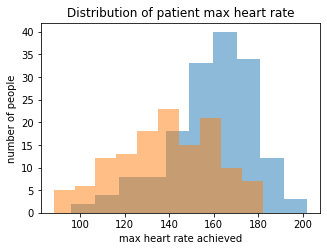

In [48]:
_ = plt.figure(figsize=(5,3.5))
_ = plt.hist(dm1, bins=10,alpha=0.5)
_ = plt.hist(dm2, bins=10,alpha=0.5)
_ = plt.xlabel('max heart rate achieved')
_ = plt.ylabel('number of people')
_ = plt.title('Distribution of patient max heart rate')
_ = plt.savefig('mhr.jpg')

## Bootstrap distribution of 10000 random samples from Max heart rate sample

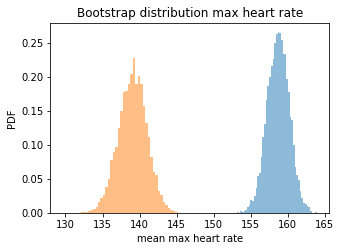

In [202]:
np.random.seed(47)
# Take 10,000 bootstrap replicates of the mean: bs_replicates
bs_replicatem1 = draw_bs_reps(dm1, np.mean, size=10000)
bs_replicatem2 = draw_bs_reps(dm2, np.mean, size=10000)

# Make a histogram of the results
_ = plt.figure(figsize=(5,3.5))
_ = plt.hist(bs_replicatem1, bins=50, density=True,alpha=0.5)
_ = plt.hist(bs_replicatem2, bins=50, density=True,alpha=0.5)
_ = plt.title('Bootstrap distribution max heart rate')
_ = plt.xlabel('mean max heart rate')
_ = plt.ylabel('PDF')
_ = plt.savefig('mhr_distmeans.jpg')

# St Depression
### Shapiro Test for normal distrubution
Ho = normally distributed

Ha = non normal distribution

In [203]:
ds1 = df1['st_depression']
ds2 = df2['st_depression']

In [204]:
normal_dist(ds1,0.05)

p_value=0.000
Not enough evidence distribution is normal (assume distribution is not normal)


In [205]:
normal_dist(ds2,0.05)

p_value=0.000
Not enough evidence distribution is normal (assume distribution is not normal)


### Levene's Test for eqaul variance
Ho = sample has equal distibution

Ha = sample has unequal distibution

In [206]:
equal_variance(ds1,ds2,0.05)

p_value=0.000
Not enough evidence the distribution has equal variance (assume distribution has unequal variance)


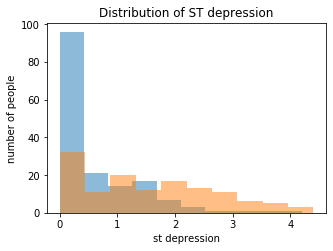

In [53]:
_ = plt.figure(figsize=(5,3.5))
_ = plt.hist(ds1, bins=10,alpha=0.5)
_ = plt.hist(ds2, bins=10,alpha=0.5)
_ = plt.xlabel('st depression')
_ = plt.ylabel('number of people')
_ = plt.title('Distribution of ST depression')
_ = plt.savefig('std.jpg')

## t Test to check similarity of population of distribution
Ho = mean of distribution 1 equal to mean of distribution 2

Ha = mean of distribution 1 not equal to mean of distribution 2

In [207]:
sample_size=300
target1 = np.random.choice(ds1, sample_size)
target2 = np.random.choice(ds2, sample_size)
compare_2_groups(target1,target2,0.05,sample_size)

p_value=0.000
Not enough evidence they are from the same distribution ( reject H0)


## Bootstrap distribution of 10000 random samples from St_Depression sample

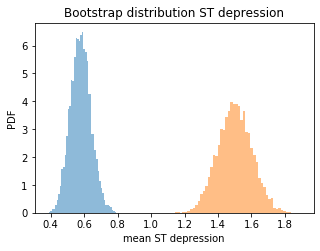

In [54]:
np.random.seed(47)
# Take 10,000 bootstrap replicates of the mean: bs_replicates
bs_replicated1 = draw_bs_reps(ds1, np.mean, size=10000)
bs_replicated2 = draw_bs_reps(ds2, np.mean, size=10000)

# Make a histogram of the results
_ = plt.figure(figsize=(5,3.5))
_ = plt.hist(bs_replicated1, bins=50, density=True,alpha=0.5)
_ = plt.hist(bs_replicated2, bins=50, density=True,alpha=0.5)
_ = plt.title('Bootstrap distribution ST depression')
_ = plt.xlabel('mean ST depression')
_ = plt.ylabel('PDF')
_ = plt.savefig('std_distmean.jpg')

## Correlation of discrete variables

In [208]:
corr = Dis_var_corr.corr()
corr

,resting_blood_pressure,cholesterol,max_heart_rate_achieved,st_depression
resting_blood_pressure,1.000000,0.137923,-0.070210,0.152445
cholesterol,0.137923,1.000000,-0.042031,0.043844
max_heart_rate_achieved,-0.070210,-0.042031,1.000000,-0.357315
st_depression,0.152445,0.043844,-0.357315,1.000000


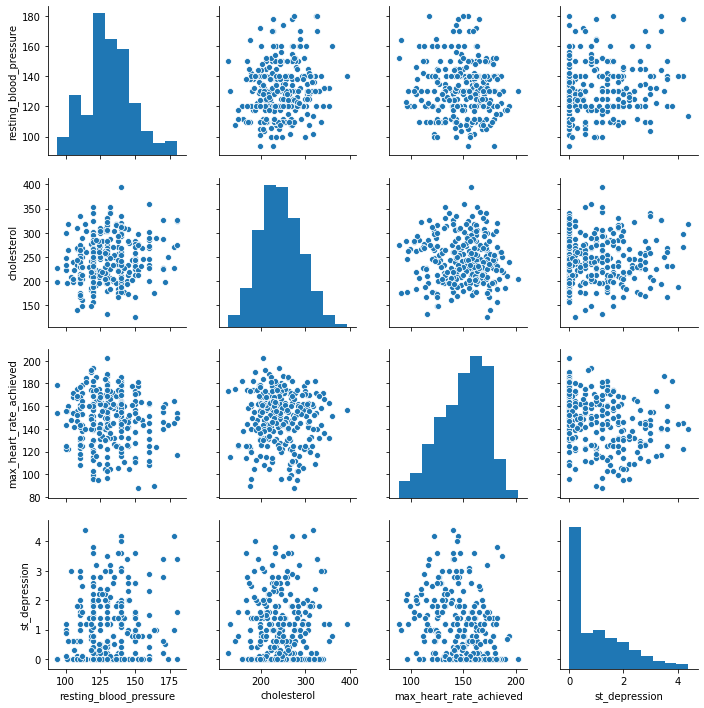

In [59]:
#checking for linear correlation between discrete continuous variables and heart disease
Dis_var_corr = df[['resting_blood_pressure','cholesterol','max_heart_rate_achieved','st_depression']]
fig = sns.pairplot(Dis_var_corr)
fig.savefig("corr.png")

### Chi square test of independence for categorical data checking whether heart disease is inpendent from fasting blood sugar

null hypothesis: there is independence between heart disease and fasting blood sugar

alternate hypothesis: there is not independence between heart disease and fasting blood sugar

In [217]:
df_fbs = pd.crosstab(df['fasting_blood_sugar'],df['target'])
df_fbs

target,0,1
fasting_blood_sugar,,
0,110,140
1,20,22


In [223]:
alpha = 0.01
statistic,pval,deg_of_freed,exp_cnt = stats.chi2_contingency(df_fbs)
print(alpha ,'>', round(pvalue,3))
print('Reject Null hypothesis, there is a relationship between fasting blood sugar and heart disease')

0.01 > 0.0
Reject Null hypothesis, there is a relationship between fasting blood sugar and heart disease


### Chi square test of independence for categorical data checking whether heart disease is inpendent from exercise induced angina

null hypothesis: there is independence between heart disease and exercise induced angina

alternate hypothesis: there is not independence between heart disease and exercise induced angina

In [224]:
df_exin = pd.crosstab(df['exercise_induced_angina'],df['target'])
df_exin

target,0,1
exercise_induced_angina,,
0,58,139
1,72,23


In [225]:
statistic,pval,deg_of_freed,exp_cnt = stats.chi2_contingency(df_exin)
print(alpha ,'>', round(pvalue,3))
print('Reject Null hypothesis, there is relationship between exercise induced angina and heart disease')

0.01 > 0.0
Reject Null hypothesis, there is relationship between exercise induced angina and heart disease


### Chi square test of independence for categorical data checking whether heart disease is inpendent from thalassemia 

Age and Experience are two independent variables

null hypothesis: heart disease and thalassemia are independent variables

alternate hypothesis:  heart disease and thalassemia are dependent variables

In [226]:
df_thal = pd.crosstab(df.thalassemia,df.target)
df_thal

target,0,1
thalassemia,,
1,12,6
2,35,129
3,83,27


In [228]:
alpha = 0.01
statistic,pval,deg_of_freed,exp_cnt = stats.chi2_contingency(df_thal)
print(alpha ,'>', round(pvalue,3))
print('Reject Null hypothesis, there is relationship between thalassemia and heart disease ')

0.01 > 0.0
Reject Null hypothesis, there is relationship between thalassemia and heart disease 


### Chi square test of independence for categorical data checking whether heart disease is independent from resting electrocardiographic

null hypothesis: there is independence between heart disease and the resting electrocardiographic levels

alternate hypothesis: there is not independence between heart disease and the resting electrocardiographic levels

In [229]:
df_recg = pd.crosstab(df['rest_ecg'],df['target'])
df_recg

target,0,1
rest_ecg,,
0,74,65
1,53,96
2,3,1


In [231]:
statistic,pval,deg_of_freed,exp_cnt = stats.chi2_contingency(df_recg)
print(alpha ,'>', round(pvalue,3))
print('Reject Null hypothesis, there is a relationship between the resting electrocardiographic \nresults and heart disease')

0.01 > 0.0
Reject Null hypothesis, there is a relationship between the resting electrocardiographic 
results and heart disease


### Chi square test of independence for categorical data checking whether heart disease is independent from chest pain 

null hypothesis: there is independence between heart disease and chest pain

alternate hypothesis: there is not independence between heart disease and chest pain

In [70]:
df_cp = pd.crosstab(df['chest_pain'],df['target'])
df_cp

target,0,1
chest_pain,,
0,97,39
1,8,41
2,18,66
3,7,16


In [232]:
statistic,pval,deg_of_freed,exp_cnt = stats.chi2_contingency(df_cp)
print(alpha ,'>', round(pvalue,3))
print('Reject Null hypothesis, there is relationship between chest pain and heart disease')

0.01 > 0.0
Reject Null hypothesis, there is relationship between chest pain and heart disease


### Chi square test of independence for categorical data checking whether heart disease is independent from slope of the peak exercise ST segment 

null hypothesis: there is independence between heart disease and the slope of the peak exercise ST segment 

alternate hypothesis: there is not independence between heart disease and the slope of the peak exercise ST segment 

In [233]:
df_sts = pd.crosstab(df['st_slope'],df['target'])
df_sts

target,0,1
st_slope,,
0,9,9
1,87,48
2,34,105


In [234]:
statistic,pval,deg_of_freed,exp_cnt = stats.chi2_contingency(df_sts)
print(alpha ,'>', round(pvalue,3))
print('Reject Null hypothesis, there is relationship between slope of the peak exercise ST segment and heart disease')

0.01 > 0.0
Reject Null hypothesis, there is relationship between slope of the peak exercise ST segment and heart disease
